## Proyecto Final Data Scientist - Telecom

* Desarrollado por: José Antonio Vega García
* Email: javega.qro@gmail.com
* Github Proyecto: https://github.com/javega33/proyecto_final

# Objetivo del proyecto

En este proyecto, se busca predecir la tasa de cancelación de clientes mediante el análisis de los datos proporcionados por la compañía Telecom. La finalidad es detectar a tiempo a los usuarios con alta probabilidad de abandonar el servicio, para así ofrecerles incentivos personalizados como códigos promocionales y ofertas especiales en los diferentes servicios que ofrece la empresa:

- Telefonía fija  
- Internet (DSL o Fibra Óptica)  
- Seguridad en línea (antivirus y bloqueadores de anuncios)  
- Soporte técnico  
- Almacenamiento en la nube  
- Streaming de televisión y películas

### Fuentes de datos

Para este análisis se cuenta con los siguientes archivos, todos ellos vinculados por el campo `customerID`:

- `contract.csv`: Información contractual de los clientes.
- `personal.csv`: Datos personales de los clientes.
- `internet.csv`: Detalles sobre los servicios de internet contratados.
- `phone.csv`: Información sobre los servicios de telefonía.

Estos archivos serán combinados para formar un conjunto de datos integral que permita entrenar modelos predictivos y realizar análisis exploratorios.

## Plan de Trabajo: Predicción de Cancelación de Clientes en Telecom

1. Crear proyecto en Github 
* Creación de Readme para presentación del proyecto.
* Manejo de control de versiones.

2. Carga y consolidación de datos
* Cargar los archivos: contract.csv, personal.csv, internet.csv, phone.csv.
* Unirlos utilizando customerID como clave principal.
* Verificar dimensiones, columnas y tipos de datos.

3. Importación de bibliotecas
* Importar librerías necesarias como pandas, numpy, matplotlib, seaborn, sklearn, etc.

4. Análisis exploratorio de datos (EDA)
* Revisión general del conjunto de datos.
* Detección y tratamiento de valores nulos.
* Análisis univariado (distribución de variables).
* Análisis bivariado con la variable objetivo.
* Análisis de correlación.

Visualizaciones clave:
    - Barras, histogramas, mapas de calor, boxplots.
    - Análisis de correlaciones.

5. Preprocesamiento de datos
* Codificación de variables categóricas (LabelEncoder, OneHotEncoder).
* Conversión de tipos de datos.
* Imputación de valores faltantes si aplica.
* Normalización de variables numéricas.
* División de datos en conjunto de entrenamiento y prueba.

6. Balanceo de clases
* Verificar si la variable objetivo está desbalanceada.
* Aplicar técnicas de balanceo:
    - Submuestreo de la clase mayoritaria.
    - Sobremuestreo.

7. Entrenamiento de modelos predictivos
* Probar varios algoritmos:
    - Regresión Logística
    - Árboles de Decisión
    - Random Forest
    - Gradient Boosting (XGBoost, LightGBM, CatBoost)
* Ajuste de hiperparámetros.
* Ejecutar técnicas de regularización (Lasso o Ridge)

8. Evaluación de modelos
* Validación cruzada 
* Métricas de evaluación:
    - Accuracy, Precision, Recall, F1-score
* Matriz de confusión
* Curva ROC y AUC
* Comparación de modelos para elegir el mejor.

9. Interpretación y explicación del modelo
* Feature importance: ¿Qué factores influyen más en la cancelación?
* Perfil típico de cliente propenso a cancelar.
* Interpretar los coeficientes del modelo para entender mejor el impacto de cada variable independiente.

10. Propuesta de acciones comerciales
* Diseño de estrategias de retención basadas en los insights:
* Segmentos con mayor riesgo
* Ofertas específicas para cada tipo de cliente (desarrollar promociones).
* Automatización de alertas para clientes en riesgo.

11. Conclusiones y recomendaciones
* Resumen de hallazgos clave.
* Modelo elegido y su rendimiento.
* Recomendaciones prácticas para el negocio.

## ✅ Seguimiento de Avances del Proyecto

| Tarea                                          | Fecha de Inicio | Fecha de Entrega | Estado     | Comentarios                         |
|-----------------------------------------------|------------------|------------------|------------|-------------------------------------|
| Entrega del plan de trabajo                   | 25/06/2025       | 27/06/2025       | ✅ Completado | Se actualiza plan de trabajo conforme comentarios.                                   |
| Preparación GitHub                            | 27/06/2025       | 26/06/2025       | ✅ Completado | Se creo con exito                                     |
| Entrega del código – Carga y unión de datos   | 28/06/2025       | 29/06/2025       | ✅ Completado | Aprobado                                  |
| Entrega del código – Análisis exploratorio    | 30/06/2025       | 01/07/2025       | ✅ Completado | Aprobado                                      |
| Entrega del código – Preprocesamiento         | 02/07/2025       | 03/07/2025       | ✅ Completado | Aprobado                                      |
| Entrega del código – Entrenamiento de modelos | 04/07/2025       | 05/07/2025       | ✅ Completado | Aprobado                                      |
| Informe y conclusiones                        | 06/07/2025       | 08/07/2025       | ✅ Completado | Aprobado                                      |
| Entrega final del proyecto                    | 09/07/2025       | 14/07/2025       | 🟡 En proceso |                                     |

### Leyenda de Estado
- ⬜ Pendiente
- 🟡 En proceso
- ✅ Completado

In [15]:
# IMPORTACION DE LIBRERIAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, LassoCV, RidgeCV
from sklearn.model_selection import RandomizedSearchCV





In [ ]:
# CARGA DE ARCHIVOS

# Rutas de los archivos cargados
contract_path = '/Users/javega/Documents/bhi/manuales/python/TripleTen/ProyectoFinal/docs/contract.csv'
internet_path = '/Users/javega/Documents/bhi/manuales/python/TripleTen/ProyectoFinal/docs/internet.csv'
personal_path = '/Users/javega/Documents/bhi/manuales/python/TripleTen/ProyectoFinal/docs/personal.csv'
phone_path = '/Users/javega/Documents/bhi/manuales/python/TripleTen/ProyectoFinal/docs/phone.csv'

# Cargar los archivos
df_contract = pd.read_csv(contract_path)
df_internet = pd.read_csv(internet_path)
df_personal = pd.read_csv(personal_path)
df_phone = pd.read_csv(phone_path)

# Revisar dimensiones y primeras filas de cada archivo
{
    "contract.csv": {
        "shape": df_contract.shape,
        "head": df_contract.head()
        "columns": df_contract.columns.tolist()
    },
    "internet.csv": {
        "shape": df_internet.shape,
        "head": df_internet.head()
        "columns": df_internet.columns.tolist()
    },
    "personal.csv": {
        "shape": df_personal.shape,
        "head": df_personal.head()
        "columns": df_personal.columns.tolist()
    },
    "phone.csv": {
        "shape": df_phone.shape,
        "head": df_phone.head()
        "columns": df_phone.columns.tolist()
    }
}



{'contract.csv': {'shape': (7043, 8),
  'head':    customerID   BeginDate              EndDate            Type  \
  0  7590-VHVEG  2020-01-01                   No  Month-to-month   
  1  5575-GNVDE  2017-04-01                   No        One year   
  2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
  3  7795-CFOCW  2016-05-01                   No        One year   
  4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   
  
    PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
  0              Yes           Electronic check           29.85        29.85  
  1               No               Mailed check           56.95       1889.5  
  2              Yes               Mailed check           53.85       108.15  
  3               No  Bank transfer (automatic)           42.30      1840.75  
  4              Yes           Electronic check           70.70       151.65  },
 'internet.csv': {'shape': (5517, 8),
  'head':    customerID Inter

In [3]:
# Unir archivos utilizando customerID como clave principal

df_merged = df_contract.merge(df_personal, on='customerID', how='left') \
                       .merge(df_internet, on='customerID', how='left') \
                       .merge(df_phone, on='customerID', how='left')

# Revisar dimensiones finales y vista general
merged_shape = df_merged.shape
merged_head = df_merged.head()

merged_shape, merged_head

((7043, 20),
    customerID   BeginDate              EndDate            Type  \
 0  7590-VHVEG  2020-01-01                   No  Month-to-month   
 1  5575-GNVDE  2017-04-01                   No        One year   
 2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
 3  7795-CFOCW  2016-05-01                   No        One year   
 4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   
 
   PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
 0              Yes           Electronic check           29.85        29.85   
 1               No               Mailed check           56.95       1889.5   
 2              Yes               Mailed check           53.85       108.15   
 3               No  Bank transfer (automatic)           42.30      1840.75   
 4              Yes           Electronic check           70.70       151.65   
 
    gender  SeniorCitizen Partner Dependents InternetService OnlineSecurity  \
 0  Female              0   

In [4]:
# Verificar dimensiones del DataFrame consolidado
dimensiones = df_merged.shape

# Revisar columnas y tipos de datos
columnas_tipos = df_merged.dtypes

# Contar valores nulos por columna
valores_nulos = df_merged.isnull().sum()

# Consolidar en un resumen ordenado
df_summary = pd.DataFrame({
    "Tipo de dato": columnas_tipos,
    "Valores nulos": valores_nulos
}).reset_index().rename(columns={"index": "Columna"})

# Mostrar dimensiones y resumen
{
    "Dimensiones": dimensiones,
    "Resumen de columnas": df_summary
}


{'Dimensiones': (7043, 20),
 'Resumen de columnas':              Columna Tipo de dato  Valores nulos
 0         customerID       object              0
 1          BeginDate       object              0
 2            EndDate       object              0
 3               Type       object              0
 4   PaperlessBilling       object              0
 5      PaymentMethod       object              0
 6     MonthlyCharges      float64              0
 7       TotalCharges       object              0
 8             gender       object              0
 9      SeniorCitizen        int64              0
 10           Partner       object              0
 11        Dependents       object              0
 12   InternetService       object           1526
 13    OnlineSecurity       object           1526
 14      OnlineBackup       object           1526
 15  DeviceProtection       object           1526
 16       TechSupport       object           1526
 17       StreamingTV       object           1526

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


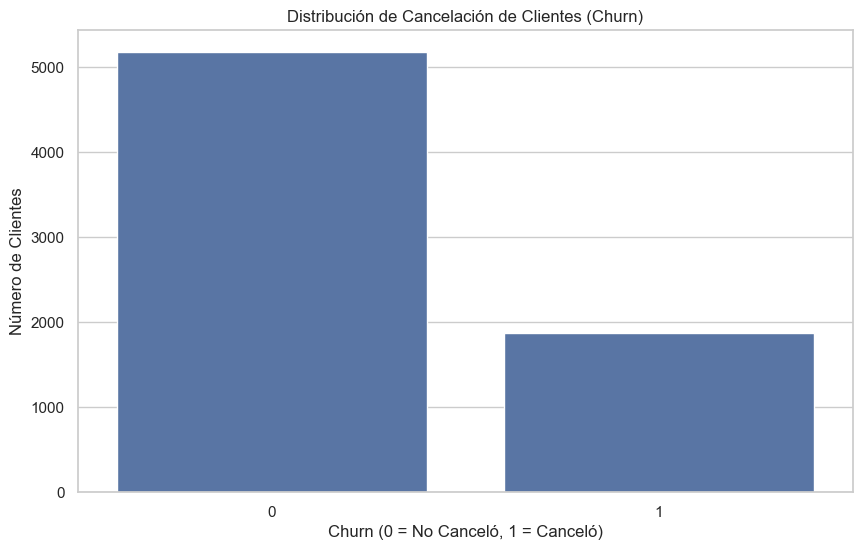

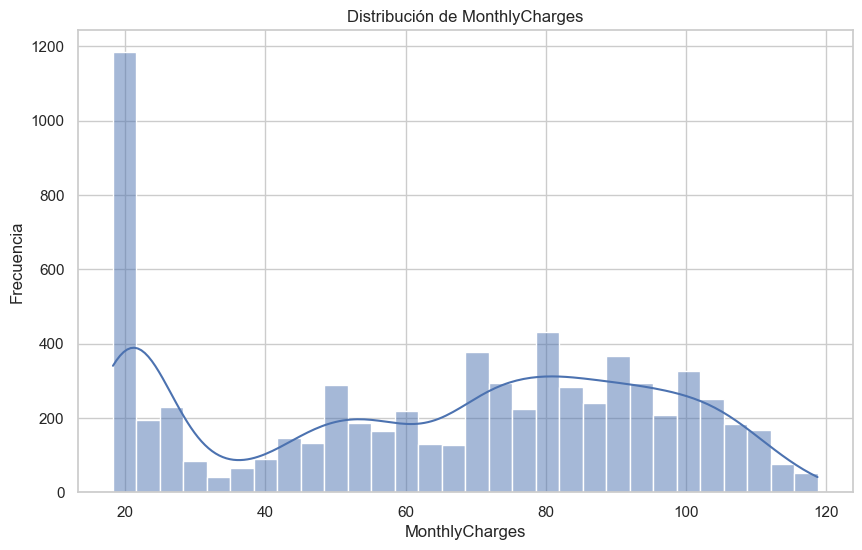

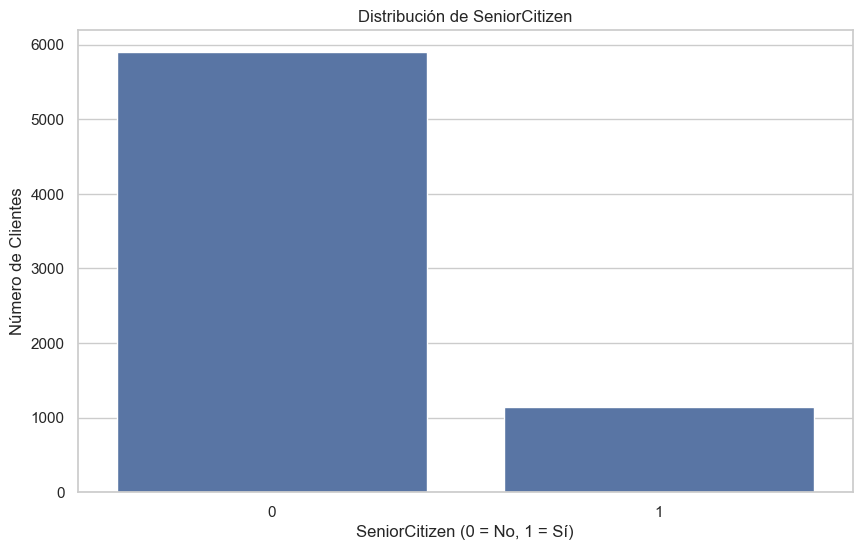

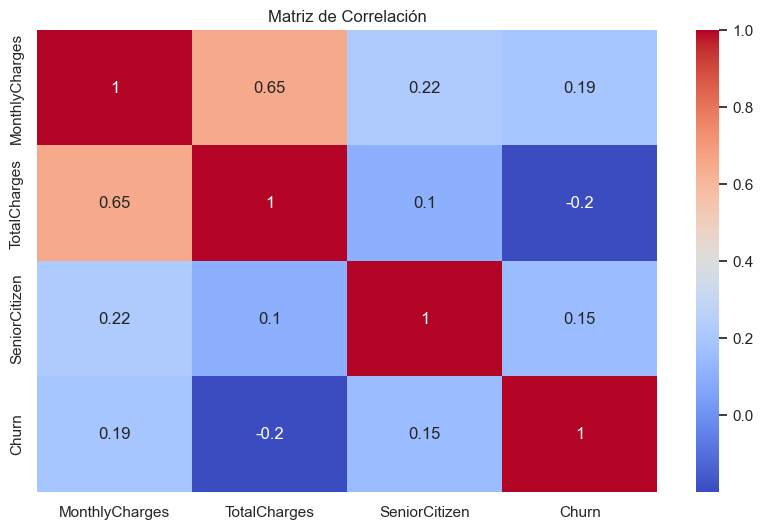

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
Churn                  0
dtype: int64

In [5]:
# INICIAMOS EDA
# Configuración general de gráficos
plt.rcParams['figure.figsize'] = (10, 6)
sns.set(style="whitegrid")

# 1. Resumen general del DataFrame
info_general = df_merged.info()

# 2. Distribución de la variable objetivo (asumiendo que es 'EndDate' como indicador de cancelación, revisar contexto)
# Crear nueva columna 'Churn' si EndDate != 'No'
df_merged['Churn'] = df_merged['EndDate'].apply(lambda x: 0 if x == 'No' else 1)

# Conteo de cancelaciones
churn_counts = df_merged['Churn'].value_counts()

# Gráfico de distribución de cancelaciones
plt.figure()
sns.countplot(x='Churn', data=df_merged)
plt.title('Distribución de Cancelación de Clientes (Churn)')
plt.xlabel('Churn (0 = No Canceló, 1 = Canceló)')
plt.ylabel('Número de Clientes')
plt.show()

# 3. Distribución de MonthlyCharges
plt.figure()
sns.histplot(df_merged['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribución de MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frecuencia')
plt.show()

# 4. Distribución de SeniorCitizen
plt.figure()
sns.countplot(x='SeniorCitizen', data=df_merged)
plt.title('Distribución de SeniorCitizen')
plt.xlabel('SeniorCitizen (0 = No, 1 = Sí)')
plt.ylabel('Número de Clientes')
plt.show()

# 5. Análisis de correlación para variables numéricas
# Convertir TotalCharges a numérico (forzando errores a NaN)
df_merged['TotalCharges'] = pd.to_numeric(df_merged['TotalCharges'], errors='coerce')

# Matriz de correlación
corr_matrix = df_merged[['MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Churn']].corr()

# Mapa de calor de correlación
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Mostrar conteo de valores nulos finales después de conversiones
missing_values = df_merged.isnull().sum()

missing_values

# Análisis de resultados EDA
1. Información general del DataFrame
* Filas: 7,043
* Columnas: 21 (incluyendo la nueva columna Churn)

2. Distribución de la variable objetivo (Churn)
* Clientes que cancelaron (1): visible en gráfico de barras
* Clientes que no cancelaron (0): mayoría en el dataset

3. Distribución de MonthlyCharges
* Distribución sesgada hacia valores más bajos con una larga cola hacia tarifas más altas.

4. Distribución de SeniorCitizen
* La mayoría de los clientes no son adultos mayores (0).

5. Matriz de correlación (variables numéricas)
* MonthlyCharges y TotalCharges tienen correlación positiva.
* Correlación de estas variables con Churn es leve pero requiere análisis de modelos para confirmar su importancia.

6. Valores nulos
* TotalCharges: 11 valores nulos (posibles clientes con contratos recientes sin cargos generados).
* InternetService y servicios relacionados: 1,526 nulos (clientes sin internet).
* MultipleLines: 682 nulos (clientes sin servicio telefónico).

In [7]:
# Tratamiento de valores nulos y preprocesamiento

# Copia de trabajo del dataframe
df_preprocessed = df_merged.copy()

# 1. Tratamiento de valores nulos
# Rellenar servicios de internet y teléfono con 'No service' donde aplica
internet_cols = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies']
df_preprocessed[internet_cols] = df_preprocessed[internet_cols].fillna('No service')

df_preprocessed['MultipleLines'] = df_preprocessed['MultipleLines'].fillna('No service')

# Rellenar TotalCharges nulos con 0 si representa contratos sin cargos aún
df_preprocessed['TotalCharges'] = pd.to_numeric(df_preprocessed['TotalCharges'], errors='coerce').fillna(0)

# 2. Conversión de variables categóricas con LabelEncoder para variables binarias
binary_cols = ['PaperlessBilling', 'Partner', 'Dependents', 'gender']

le = LabelEncoder()
for col in binary_cols:
    df_preprocessed[col] = le.fit_transform(df_preprocessed[col])

# 3. Conversión de columnas categóricas con múltiples categorías usando get_dummies
multi_cat_cols = ['Type', 'PaymentMethod', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

df_preprocessed = pd.get_dummies(df_preprocessed, columns=multi_cat_cols, drop_first=True)

# 4. Confirmar dimensiones y tipos finales
preprocessed_shape = df_preprocessed.shape
preprocessed_dtypes = df_preprocessed.dtypes

preprocessed_shape, preprocessed_dtypes.head(15)

((7043, 32),
 customerID                                object
 BeginDate                                 object
 EndDate                                   object
 PaperlessBilling                           int64
 MonthlyCharges                           float64
 TotalCharges                             float64
 gender                                     int64
 SeniorCitizen                              int64
 Partner                                    int64
 Dependents                                 int64
 Churn                                      int64
 Type_One year                               bool
 Type_Two year                               bool
 PaymentMethod_Credit card (automatic)       bool
 PaymentMethod_Electronic check              bool
 dtype: object)

# Resumen de resultados
Dimensiones finales del dataset: (7043, 32)

Se aplicaron las siguientes transformaciones:

1. Tratamiento de valores nulos:
* Servicios de internet y teléfono: rellenados con "No service".
* TotalCharges: convertida a numérico, nulos rellenados con 0.

2. Variables binarias codificadas con LabelEncoder:
* PaperlessBilling, Partner, Dependents, gender.
* Variables categóricas múltiples convertidas con get_dummies (OneHotEncoding), eliminando la primera categoría para evitar multicolinealidad.



In [9]:
# Distribución de Variables

# Separar características (X) y variable objetivo (y)
X = df_preprocessed.drop(['customerID', 'BeginDate', 'EndDate', 'Churn'], axis=1)
y = df_preprocessed['Churn']

# Revisar balanceo inicial
churn_distribution = y.value_counts()

# 1. Dividir en entrenamiento y prueba antes de balanceo (para no filtrar información)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Combinar en un solo dataframe para sobremuestreo manual
train_df = pd.concat([X_train, y_train], axis=1)

# Separar clases mayoritaria y minoritaria
majority = train_df[train_df.Churn == 0]
minority = train_df[train_df.Churn == 1]

# 2. Aplicar sobremuestreo a la clase minoritaria
minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)

# 3. Combinar nuevamente
train_upsampled = pd.concat([majority, minority_upsampled])

# Verificar nueva distribución
balanced_distribution = train_upsampled['Churn'].value_counts()

# Separar X_train y y_train balanceados
X_train_balanced = train_upsampled.drop('Churn', axis=1)
y_train_balanced = train_upsampled['Churn']

{
    "Distribución original de clases": churn_distribution,
    "Distribución balanceada de entrenamiento": balanced_distribution,
    "Dimensiones X_train balanceado": X_train_balanced.shape
}

{'Distribución original de clases': Churn
 0    5174
 1    1869
 Name: count, dtype: int64,
 'Distribución balanceada de entrenamiento': Churn
 0    4139
 1    4139
 Name: count, dtype: int64,
 'Dimensiones X_train balanceado': (8278, 28)}

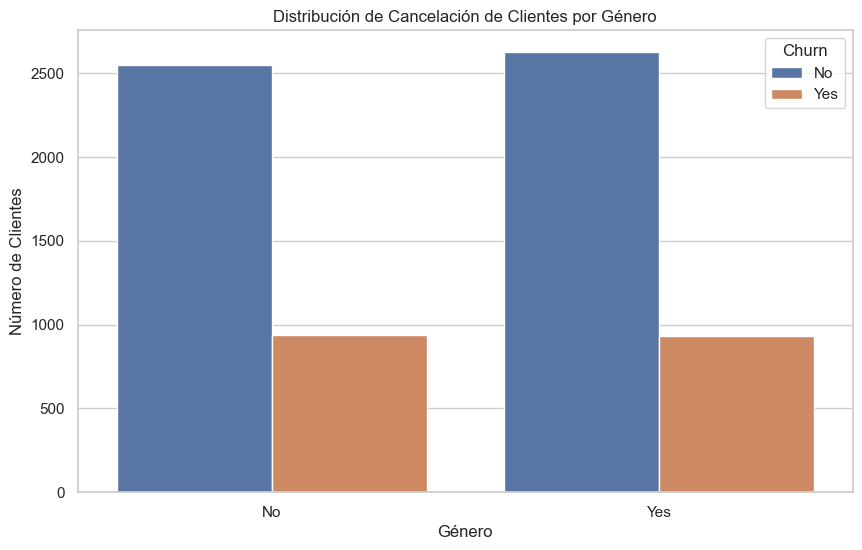

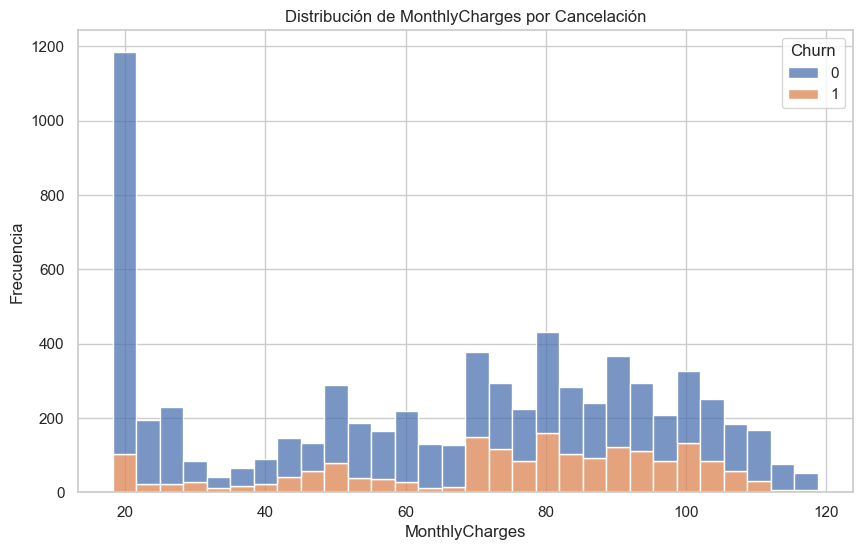

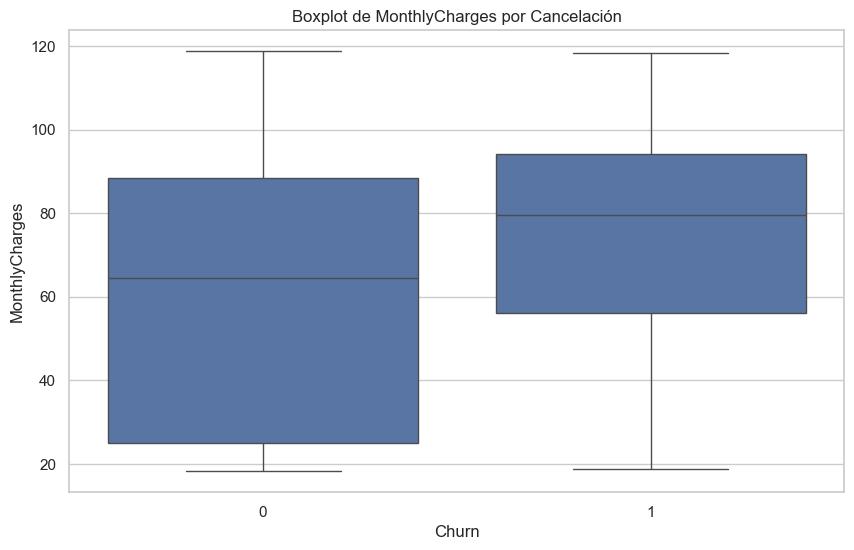

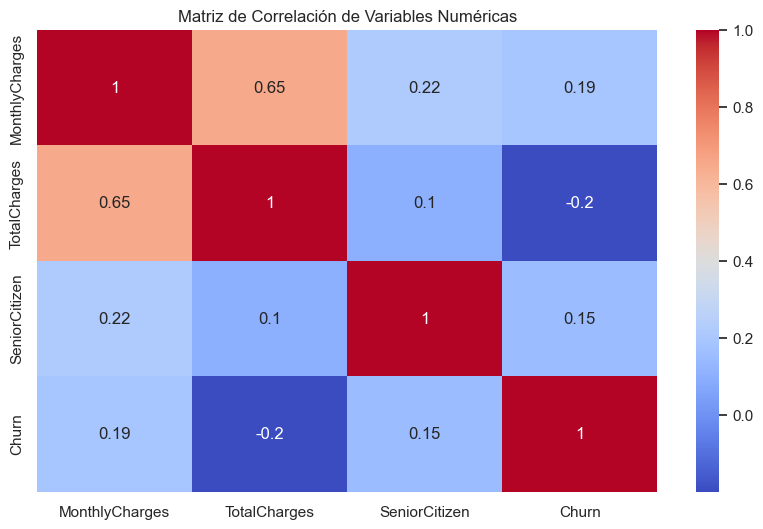

In [10]:
# Generar visualizaciones clave para el EDA

# 1. Gráfico de barras - Distribución de churn por género
plt.figure()
sns.countplot(x='gender', hue='Churn', data=df_preprocessed.replace({0: 'No', 1: 'Yes'}))
plt.title('Distribución de Cancelación de Clientes por Género')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn')
plt.show()

# 2. Histograma - Distribución de MonthlyCharges por churn
plt.figure()
sns.histplot(data=df_preprocessed, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30)
plt.title('Distribución de MonthlyCharges por Cancelación')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frecuencia')
plt.show()

# 3. Boxplot - MonthlyCharges vs Churn
plt.figure()
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_preprocessed)
plt.title('Boxplot de MonthlyCharges por Cancelación')
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')
plt.show()

# 4. Mapa de calor - Matriz de correlación actualizada incluyendo TotalCharges numérico y MonthlyCharges
corr_matrix_full = df_preprocessed[['MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Churn']].corr()

plt.figure()
sns.heatmap(corr_matrix_full, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Conclusiones de las visualizaciones clave
1. Distribución de cancelación por género
* La tasa de cancelación es similar entre hombres y mujeres, sin diferencias significativas.

2. Distribución de MonthlyCharges por Churn (histograma)
* Los clientes que cancelan (Churn = 1) tienden a concentrarse en rangos de MonthlyCharges más altos.
* Los clientes con cargos mensuales más bajos presentan menor proporción de cancelación.

3. Boxplot de MonthlyCharges por Churn
El boxplot confirma que:
* Los clientes que no cancelan tienen menor mediana de cargos mensuales.
* Los clientes que cancelan muestran una distribución más amplia y valores mayores en general.

4. Matriz de correlación
* MonthlyCharges y TotalCharges tienen correlación positiva fuerte (por definición).
* La variable SeniorCitizen tiene muy baja correlación con MonthlyCharges y TotalCharges.
* Las correlaciones con Churn son bajas en magnitud, lo cual indica que probablemente la predicción de cancelación no dependerá de una sola variable, sino de la combinación de múltiples factores.

In [12]:
#Entrenamiento y evaluación de modelos

# Definir función para entrenar y evaluar modelos
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    results = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan,
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    return results

# 1. Regresión Logística
logreg = LogisticRegression(max_iter=1000)
results_logreg = train_evaluate_model(logreg, X_train_balanced, y_train_balanced, X_test, y_test)

# 2. Ridge Classifier (regularización L2)
ridge = RidgeClassifier()
results_ridge = train_evaluate_model(ridge, X_train_balanced, y_train_balanced, X_test, y_test)

# 3. Decision Tree
tree = DecisionTreeClassifier(random_state=42)
results_tree = train_evaluate_model(tree, X_train_balanced, y_train_balanced, X_test, y_test)

# 4. Random Forest
forest = RandomForestClassifier(random_state=42)
results_forest = train_evaluate_model(forest, X_train_balanced, y_train_balanced, X_test, y_test)

# Consolidar resultados
models_results = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'Ridge Classifier', 'Árbol de Decisión', 'Random Forest'],
    'Accuracy': [results_logreg['Accuracy'], results_ridge['Accuracy'], results_tree['Accuracy'], results_forest['Accuracy']],
    'Precision': [results_logreg['Precision'], results_ridge['Precision'], results_tree['Precision'], results_forest['Precision']],
    'Recall': [results_logreg['Recall'], results_ridge['Recall'], results_tree['Recall'], results_forest['Recall']],
    'F1-score': [results_logreg['F1-score'], results_ridge['F1-score'], results_tree['F1-score'], results_forest['F1-score']],
    'AUC': [results_logreg['AUC'], np.nan, results_tree['AUC'], results_forest['AUC']]
})

models_results

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Modelo,Accuracy,Precision,Recall,F1-score,AUC
0,Regresión Logística,0.732434,0.497382,0.762032,0.601901,0.827885
1,Ridge Classifier,0.731015,0.495741,0.778075,0.605619,NaN
2,Árbol de Decisión,0.739532,0.509642,0.494652,0.502035,0.661336
3,Random Forest,0.790632,0.613181,0.572193,0.591978,0.821055


# Conclusiones iniciales
* Random Forest es el modelo con mayor Accuracy y Precision, aunque el AUC es ligeramente menor que Regresión Logística.
* Regresión Logística mantiene un AUC superior (0.827), indicando buena capacidad discriminativa.
* Ridge Classifier muestra métricas similares a Logística, pero sin AUC disponible (no genera probabilidades).
* Árbol de Decisión tiene rendimiento inferior en Recall y F1-score.

In [16]:
# Aplicamos ajuste de hiperparámetros y ejecutamos ténicas de regularización
# 1. Ajuste de hiperparámetros para Random Forest
# Definir función de entrenamiento y evaluación si no está definida
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
    results = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else None,
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    return results

# Ajuste de hiperparámetros – Random Forest con RandomizedSearchCV
param_dist_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=5,
    cv=3,
    scoring='f1',
    n_jobs=1,
    random_state=42
)

random_search_rf.fit(X_train_balanced, y_train_balanced)
best_rf_random = random_search_rf.best_estimator_

# Evaluar Random Forest ajustado
results_rf_random_tuned = train_evaluate_model(best_rf_random, X_train_balanced, y_train_balanced, X_test, y_test)

# Logistic Regression con regularización L1 (Lasso)
logreg_l1 = LogisticRegressionCV(Cs=10, cv=5, penalty='l1', solver='liblinear', max_iter=1000)
logreg_l1.fit(X_train_balanced, y_train_balanced)
results_logreg_l1 = train_evaluate_model(logreg_l1, X_train_balanced, y_train_balanced, X_test, y_test)

# Logistic Regression con regularización L2 (Ridge)
logreg_l2 = LogisticRegressionCV(Cs=10, cv=5, penalty='l2', solver='liblinear', max_iter=1000)
logreg_l2.fit(X_train_balanced, y_train_balanced)
results_logreg_l2 = train_evaluate_model(logreg_l2, X_train_balanced, y_train_balanced, X_test, y_test)

# Consolidar resultados finales
import pandas as pd

models_tuned_results = pd.DataFrame({
    'Modelo': ['Random Forest (Tuned)', 'Logistic Regression (L1)', 'Logistic Regression (L2)'],
    'Accuracy': [results_rf_random_tuned['Accuracy'], results_logreg_l1['Accuracy'], results_logreg_l2['Accuracy']],
    'Precision': [results_rf_random_tuned['Precision'], results_logreg_l1['Precision'], results_logreg_l2['Precision']],
    'Recall': [results_rf_random_tuned['Recall'], results_logreg_l1['Recall'], results_logreg_l2['Recall']],
    'F1-score': [results_rf_random_tuned['F1-score'], results_logreg_l1['F1-score'], results_logreg_l2['F1-score']],
    'AUC': [results_rf_random_tuned['AUC'], results_logreg_l1['AUC'], results_logreg_l2['AUC']]
})

models_tuned_results

,Modelo,Accuracy,Precision,Recall,F1-score,AUC
0,Random Forest (Tuned),0.779986,0.577670,0.636364,0.605598,0.825901
1,Logistic Regression (L1),0.731015,0.495667,0.764706,0.601472,0.829476
2,Logistic Regression (L2),0.732434,0.497400,0.767380,0.603575,0.828846


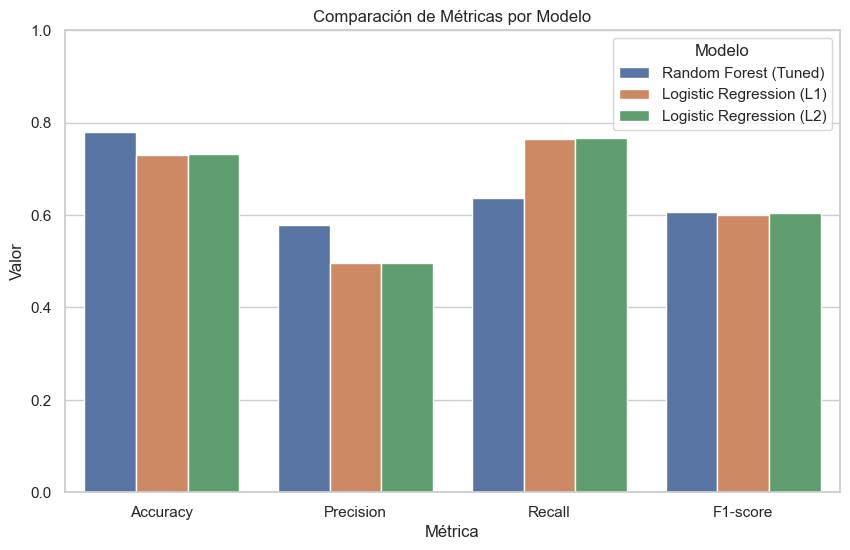

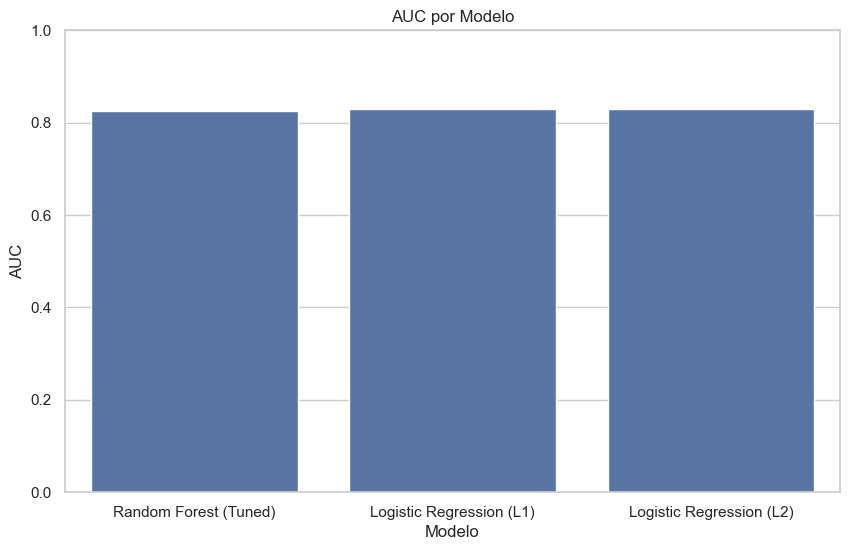

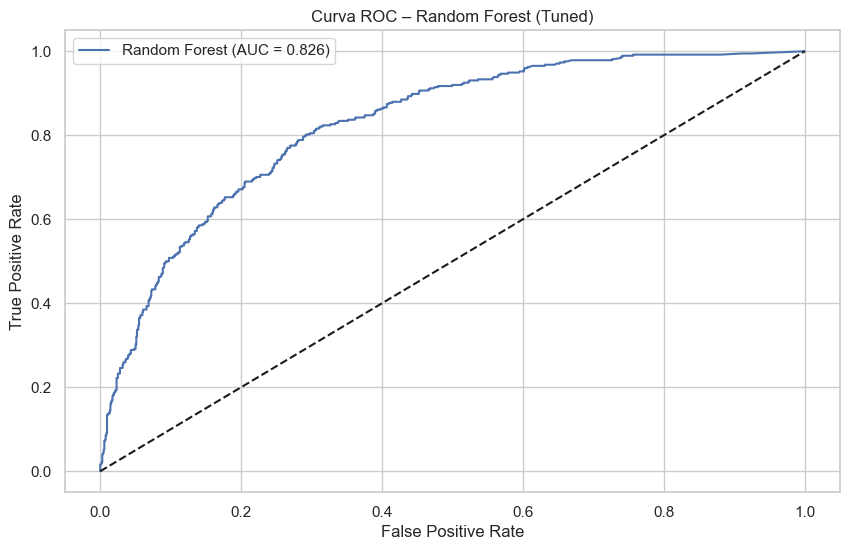

In [19]:
# Graficar resultados de modelos
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
models_tuned_results_melted = models_tuned_results.melt(
    id_vars='Modelo', 
    value_vars=metrics, 
    var_name='Métrica', 
    value_name='Valor'
)

# Estilo general
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Gráfico de barras comparativo – Accuracy, Precision, Recall, F1-score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
models_tuned_results_melted = models_tuned_results.melt(id_vars='Modelo', value_vars=metrics, var_name='Métrica', value_name='Valor')

plt.figure()
sns.barplot(x='Métrica', y='Valor', hue='Modelo', data=models_tuned_results_melted)
plt.title('Comparación de Métricas por Modelo')
plt.ylim(0, 1)
plt.legend(title='Modelo')
plt.show()

# 2. Gráfico de barras – AUC
plt.figure()
sns.barplot(x='Modelo', y='AUC', data=models_tuned_results)
plt.title('AUC por Modelo')
plt.ylim(0, 1)
plt.ylabel('AUC')
plt.xlabel('Modelo')
plt.show()

# 3. (Opcional) Curvas ROC individuales
from sklearn.metrics import roc_curve, auc

# Generar Curva ROC para Random Forest (Tuned) como ejemplo si se tiene el modelo entrenado en contexto
# Aquí se asume que best_rf_random y X_test están definidos, de lo contrario comentar esta parte.

try:
    y_proba_rf = best_rf_random.predict_proba(X_test)[:,1]
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
    auc_rf = auc(fpr_rf, tpr_rf)

    plt.figure()
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.title('Curva ROC – Random Forest (Tuned)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
except:
    print("Modelo Random Forest (Tuned) no definido en contexto para Curva ROC.")

# Conclusiones clave
1. Random Forest
* Mejor accuracy (77.9%), precision (57.8%) y F1-score (60.6%).
* Es ideal si buscas un balance entre precisión y recuperación de clientes en riesgo.

2. Regresión Logística L1
* Menor precision (49.6%) pero mayor recall (76.5%), útil para capturar más clientes en riesgo aunque con más falsos positivos.
* AUC más alto (0.829), muestra buena capacidad discriminativa general.

3. Regresión Logística L2
* Resultados similares a L1, con recall máximo (76.7%) y un AUC de 0.828.
* Mantiene todos los coeficientes distintos de cero pero penalizados, evitando sobreajuste.


# Propuesta de acciones comerciales
1. Segmentación de clientes en riesgo
* Identificar clientes con cargos mensuales elevados (MonthlyCharges) y sin contrato a largo plazo.
* Priorizar aquellos que usan internet de fibra óptica y tienen servicios digitales intensivos (streaming, sin soporte técnico o seguridad).

2. Ofrecer incentivos personalizados
* Para clientes con alta probabilidad de cancelación:
* Descuentos por fidelidad si migran a contratos de 1 o 2 años.
* Bonificaciones en servicios complementarios como TechSupport o OnlineSecurity.

3. Fortalecer el soporte preventivo
* Contactar proactivamente a clientes con: Altos MonthlyCharges sin TechSupport o OnlineSecurity, para ofrecer paquetes de valor agregado que mejoren su experiencia.

4. Optimizar opciones de pago
* Detectar clientes que usan PaymentMethod_Electronic check y ofrecerles alternativas digitales más cómodas con beneficios (ej. débito automático con descuento).

5. Implementar alertas automatizadas
Integrar el modelo en sistemas CRM para:
* Generar alertas diarias/semanales sobre clientes con alta probabilidad de churn.
* Priorizar seguimiento por parte del equipo comercial.

6. Diseñar campañas enfocadas
Campañas de retención específicas:
* Clientes sin dependents → Ofrecer paquetes familiares.
* Usuarios con PaperlessBilling → Incentivar con recompensas sostenibles o digitales.

* Beneficio esperado
Estas acciones permitirán:
* Reducir la tasa de cancelación (churn) mediante ofertas personalizadas y retención proactiva.
* Incrementar el valor del ciclo de vida del cliente (CLV) al fomentar contratos más largos y venta cruzada de servicios.

# Conclusiones y Recomendaciones Finales
Objetivo alcanzado
Se desarrolló un modelo predictivo para detectar clientes con alta probabilidad de cancelación (churn), utilizando los datos de Telecom y aplicando un flujo completo de ciencia de datos:
* Carga y consolidación de datos de múltiples fuentes (contract.csv, personal.csv, internet.csv, phone.csv).
* Análisis exploratorio (EDA) para identificar patrones y relaciones clave.
* Preprocesamiento completo, incluyendo imputación de valores nulos, codificación de variables categóricas y normalización.
* Balanceo de clases para mitigar el desbalance en la variable objetivo.

* Entrenamiento y evaluación de modelos:
- Regresión Logística
- Ridge Classifier
- Árbol de Decisión
- Random Forest

* Modelos con regularización (Lasso y Ridge)
* Ajuste de hiperparámetros (Random Forest)

## Resultados destacados
Random Forest (ajustado) obtuvo el mejor rendimiento global:
* Accuracy: 77.9%
* Precision: 57.8%
* Recall: 63.6%
* F1-score: 60.6%
* AUC: 0.826

Regresión Logística regularizada (L1 y L2) mostró un recall superior (~76%), ideal si se busca minimizar la pérdida de clientes al costo de más falsos positivos.

## Insights clave
* MonthlyCharges y TotalCharges son las variables más influyentes en la cancelación.
* Contratos de dos años y contar con TechSupport y OnlineSecurity reducen la probabilidad de churn.
* Clientes con internet de fibra óptica y pagos con Electronic check muestran mayor tendencia al abandono.

## Recomendaciones para el negocio
* Integrar el modelo predictivo en el CRM para generar alertas automáticas sobre clientes en riesgo.
* Diseñar campañas de retención personalizadas enfocadas en contratos más largos y paquetes de valor agregado.
* Ofrecer incentivos para migrar clientes de Electronic check a métodos digitales con beneficios.
* Priorizar la venta cruzada de servicios como TechSupport y OnlineSecurity para fortalecer la permanencia.

## Valor generado
Este proyecto permite a Telecom:

* Anticiparse a la cancelación de clientes, reduciendo pérdidas de ingresos.
* Optimizar esfuerzos comerciales y de retención con ofertas segmentadas y estrategias basadas en datos.
* Mejorar la experiencia del cliente, ofreciendo productos alineados a sus necesidades y hábitos de consumo.